 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Low-level-TensorFlow-API" data-toc-modified-id="Low-level-TensorFlow-API-1">Low-level TensorFlow API</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Graph" data-toc-modified-id="Graph-1.1">Graph</a></span></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Session" data-toc-modified-id="Session-1.2">Session</a></span></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Tensors" data-toc-modified-id="Tensors-1.3">Tensors</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Constants" data-toc-modified-id="Constants-1.3.1">Constants</a></span></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Variables" data-toc-modified-id="Variables-1.3.2">Variables</a></span></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Placeholders" data-toc-modified-id="Placeholders-1.3.3">Placeholders</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Training-a-model" data-toc-modified-id="Training-a-model-1.4">Training a model</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Higher-level-TensorFlow-API:-Estimators" data-toc-modified-id="Higher-level-TensorFlow-API:-Estimators-2">Higher-level TensorFlow API: Estimators</a></span></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#Custom-model" data-toc-modified-id="Custom-model-3">Custom model</a></span></li><li><span><a href="http://localhost:8888/notebooks/PycharmProjects/Playfield/tensorflow_introduction.ipynb#References" data-toc-modified-id="References-4">References</a></span></li></ul></div>

# Tensorflow introduction

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Low-level TensorFlow API

### Graph

A _graph_ is used to define operations.

In [3]:
# call the default graph
graph = tf.get_default_graph()

# print operations in the graph
for op in graph.get_operations():
    print(op.name)

### Session

Operations are run within a _session_.

In [4]:
a = tf.constant(2.3)

# run an operation without a session
print(a)

# run the operation within a session
sess = tf.Session()
print(sess.run(a))
sess.close()

Tensor("Const:0", shape=(), dtype=float32)
2.3


The session could be used with automatic closing like this:

In [5]:
with tf.Session() as sess:
    print(sess.run(a))

2.3


### Tensors

Tensors are data structures in which data is stored, similar to multi dimensional arrays in NumPy. One type of a tensor is _constant_.

#### Constants

In [6]:
# Define two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])
print("x1:", x1)

result = tf.multiply(x1, x2)

print("result:", result)

x1: Tensor("Const_1:0", shape=(4,), dtype=int32)
result: Tensor("Mul:0", shape=(4,), dtype=int32)


The Tensors above, the constants, or 'result', are just models. They aren't actually calculated. To print/access them, they need to be run in a session:

In [7]:
sess = tf.Session()
print(sess.run(result))
print(sess.run(a))
sess.close()

[ 5 12 21 32]
2.3


#### Variables

Apart from 'constants' there are also 'placeholder' and 'variable' types of tensors. Variables are values that can change, just like in any programming language.

In [8]:
b = tf.Variable(2.0, name='var1')
print(b)

<tf.Variable 'var1:0' shape=() dtype=float32_ref>


Variables need to be initialised by explicitly calling a special operation. To initialise all variables you can use the following function, then access the variable 'b'.

In [9]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(b))

2.0


#### Placeholders

Placeholders are values (tensors) which are unassigned, and that will be initialized by the session when it's run. They usually represent external inputs. These are used for training data. The object that is fed to Placeholder is called feed_dict - a key-value pairs.

In [10]:
p1 = tf.placeholder("float")
p2 = tf.placeholder("float")
y = tf.multiply(p1, p2)

# create a feed_dict object
feed_dict = {p1: 2, p2: 3}
with tf.Session() as sess:
    print(sess.run(y, feed_dict=feed_dict))

6.0


Finally the sessions can be run on a GPU, CPU, a cluster etc., and you can choose where to run it. The complete picture:

<img src="http://cv-tricks.com/wp-content/uploads/2017/02/xTensorflow_Graph_0.png.pagespeed.ic.U_RLEnluD2.webp">

------------------------------

### Training a model

In [11]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3])
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(linear_model, feed_dict={x: [1, 2, 3, 4]}))

[ 0.          0.30000001  0.60000002  0.90000004]


In [13]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

# Create a summary for the loss value
tf.summary.scalar('loss', loss)

# Merge all summaries and write them to file
merged = tf.summary.merge_all()
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

23.66


In [14]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
sess.run([fixW, fixb])
print(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))

0.0


Create an optimizer. Optimizers slowly change each variable until a loss function is minimized. The simplest example of an optimizer in tf is gradient descent.

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# Create a tf.summary.FileWriter object that takes a 'logdir' destination, and optinally the model's graph
train_writer = tf.summary.FileWriter('./train', sess.graph)

Now go through 1000 iterations with the above learning rate of 0.01, and print out the learned variable values.

[array([-0.84079814], dtype=float32), array([ 0.53192717], dtype=float32)]


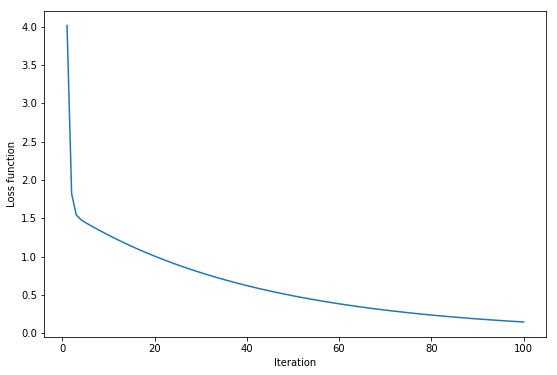

In [16]:
sess.run(init)
loss_plot = []
for i in range(100):
    sess.run(train, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
    loss_plot.append(sess.run(loss, {x: [1, 2, 3, 4], y: [0, -1, -2, -3]}))
    
    # Record summaries
    summary = sess.run(merged, feed_dict={x: [1, 2, 3, 4], y: [0, -1, -2, -3]})
    train_writer.add_summary(summary, i)
    
#     print("W: %2f, b: %.2f" % (sess.run(W), sess.run(b)))

plt.figure(figsize=(9,6))
plt.plot(np.linspace(start=1, stop=100, num=100), loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss function")
print(sess.run([W, b]))

## Higher-level TensorFlow API: Estimators

Estimators enable a more high-level and easier workflow with TensorFlow, simplifying: training, evaluation and dataset management. The above linear regression example is much simpler using Estimators:

In [17]:
# A list of features
feature_cols = [tf.feature_column.numeric_column("x", shape=[1])]

# Use LinearRegressor Estimator. There are various types of Estimators in tf, for classification, regression, neural nets etc.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_cols)

# Generate the training and evaluation (testing) data
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7., 0.])

# Input training and evaluation data into the estimator, specifying batch size and number of epochs
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": x_train}, y=y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)
       
# Train the model in 1000 training steps
estimator.train(input_fn=input_fn, steps=1000)

# Evaluate the model
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r" % train_metrics)
print("eval metrics: %r" % eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kt/50kqr6596n52pkfjk2x5hl3h0000gp/T/tmplclskeii', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/kt/50kqr6596n52pkfjk2x5hl3h0000gp/T/tmplclskeii/model.ckpt.
INFO:tensorflow:loss = 9.0, step = 1
INFO:tensorflow:global_step/sec: 915.919
INFO:tensorflow:loss = 0.364415, step = 101 (0.111 sec)
INFO:tensorflow:global_step/sec: 859.698
INFO:tensorflow:loss = 0.0207924, step = 201 (0.116 sec)
INFO:tensorflow:global_step/sec: 854.576
INFO:tensorflow:loss = 0.00793199, step = 301 (0.117 sec)
INFO:tensorflow:global_step/sec: 851.1
INFO:tensorflow:loss = 0.00313569, step = 401 (0.117 sec)
INFO:tensorflow:global_st

## Custom model

TensorFlow enables to build custom models, that is, to create a model which is not included in tf.estimator using low-level tf API, while still being able to use the benefits of high-level estimators.

In [18]:
# Create the new model which returns tf.estimator.EstimatorSpec
def model_fn(features, labels, mode):
    
    # Similar to the low-level API, define the variables that need to be estimated,
    # and the graph producing the output
    W = tf.get_variable("W", [1], dtype=tf.float64)
    b = tf.get_variable("b", [1], dtype=tf.float64)
    y = W * features['x'] + b
    
    # Loss sub-graph
    loss = tf.reduce_sum(tf.square(y - labels))
    
    # Training sub-graph. Why do we need to change the global step?
    global_step = tf.train.get_global_step()
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train = tf.group(optimizer.minimize(loss), tf.assign_add(global_step, 1))
    
    # Use EstimatorSpec to connect sub-graphs
    return tf.estimator.EstimatorSpec(mode=mode, predictions=y, loss=loss, train_op=train)


estimator = tf.estimator.Estimator(model_fn=model_fn)

# The rest is same as earlier:
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

estimator.train(input_fn=input_fn, steps=1000)
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/kt/50kqr6596n52pkfjk2x5hl3h0000gp/T/tmpdx053qlu', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/kt/50kqr6596n52pkfjk2x5hl3h0000gp/T/tmpdx053qlu/model.ckpt.
INFO:tensorflow:loss = 19.4683979238, step = 1
INFO:tensorflow:global_step/sec: 920.546
INFO:tensorflow:loss = 0.024501608079, step = 101 (0.111 sec)
INFO:tensorflow:global_step/sec: 848.702
INFO:tensorflow:loss = 0.00295356546819, step = 201 (0.118 sec)
INFO:tensorflow:global_step/sec: 554.032
INFO:tensorflow:loss = 7.99642422051e-05, step = 301 (0.179 sec)
INFO:tensorflow:global_step/sec: 650.149
INFO:tensorflow:loss = 1.25875577107e-05, step = 40

We got a similar (slightly better) result with our custom model, minimizing the loss function.

## References

- cv-tricks.com website (link: http://cv-tricks.com/artificial-intelligence/deep-learning/deep-learning-frameworks/tensorflow/tensorflow-tutorial/)
- tensorflow.org website